In [87]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  

import matplotlib.pyplot as plt        
%matplotlib inline                
from statistics import mean

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
    
def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DeprecationWarning) 
    warnings.filterwarnings('ignore', category = FutureWarning) 


# Loading Data

In [88]:
train=pd.read_csv("train_loan_prediction.csv")
test=pd.read_csv("test_loan_prediction.csv")
train_original=train.copy()
test_original=test.copy()

In [89]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [90]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [91]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [92]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [93]:
train.shape, test.shape

((614, 13), (367, 12))

In [94]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Visualization

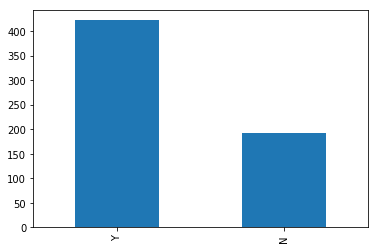

In [95]:
train['Loan_Status'].value_counts().plot.bar()

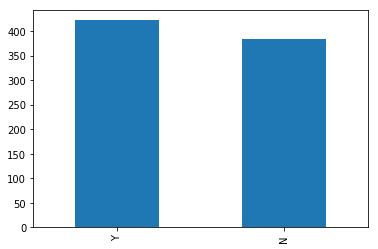

In [96]:
train = pd.concat([train, train[train['Loan_Status'] == 'N']]) #Balancing Data 
train['Loan_Status'].value_counts().plot.bar()

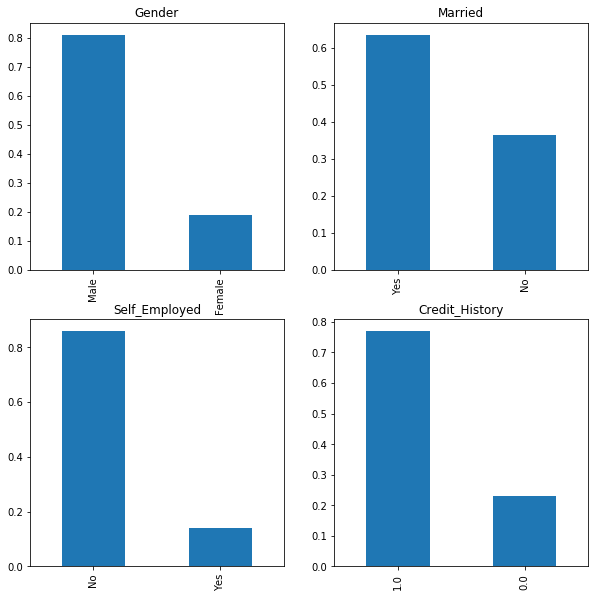

In [97]:
#Independent Variable (Categorical)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

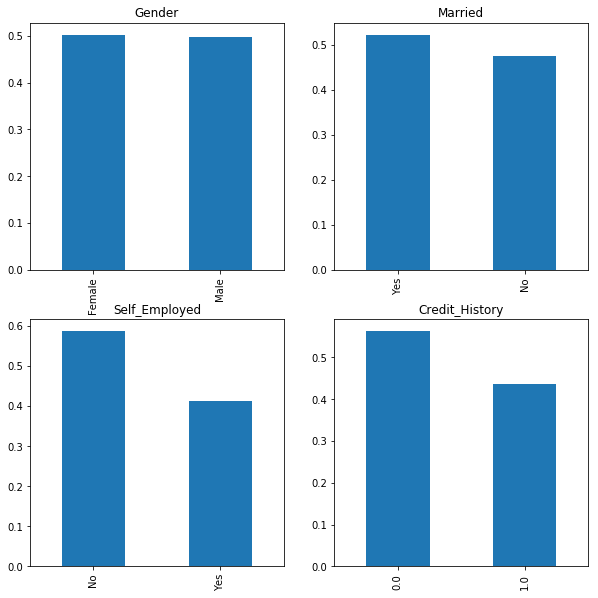

In [99]:
train = pd.concat([train, train[train['Gender'] == 'Female']])
train = pd.concat([train, train[train['Credit_History'] == 0.0]])                 #Balancing Data 
train[train['Credit_History'] == 0.0]
train = pd.concat([train, train[train['Self_Employed'] == 'Yes']])

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

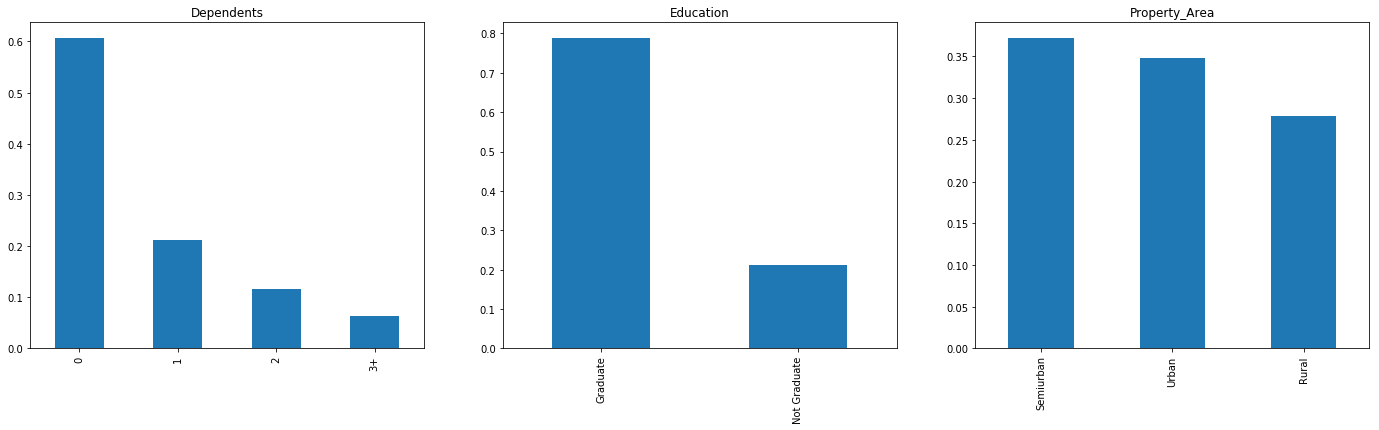

In [100]:
#Independent Variable (Ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

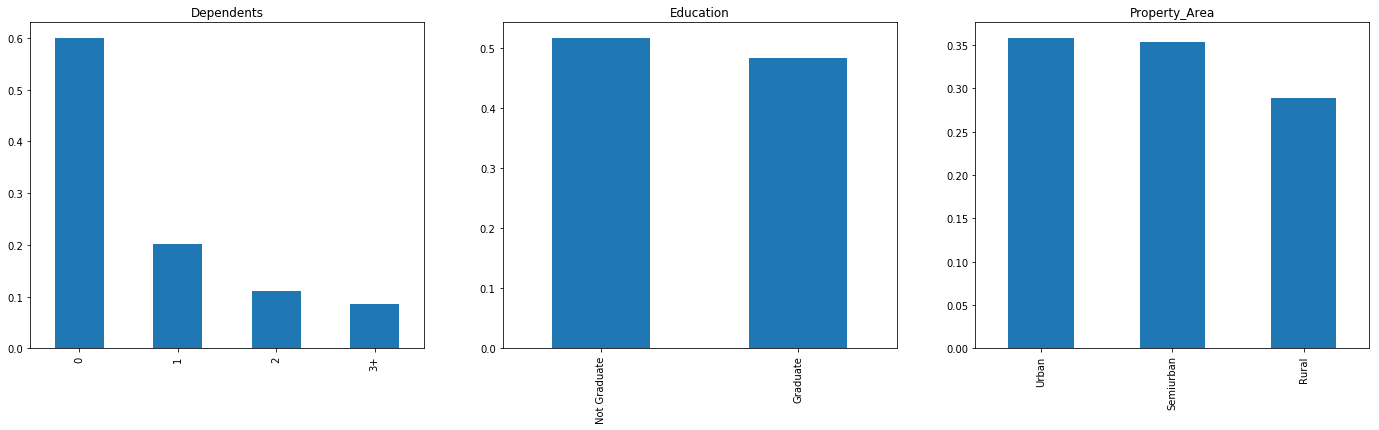

In [102]:
train = pd.concat([train, train[train['Education'] == 'Not Graduate']])


plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

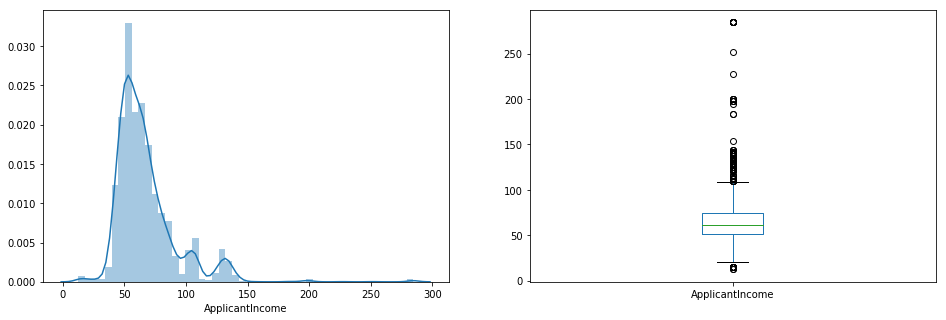

In [103]:
train['ApplicantIncome'] = np.sqrt(train['ApplicantIncome'])
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

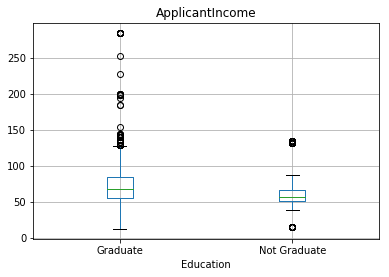

In [104]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

In [105]:
train.isnull().sum()

Loan_ID                0
Gender                72
Married                6
Dependents           165
Education              0
Self_Employed        116
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount           270
Loan_Amount_Term     263
Credit_History       234
Property_Area          0
Loan_Status            0
dtype: int64

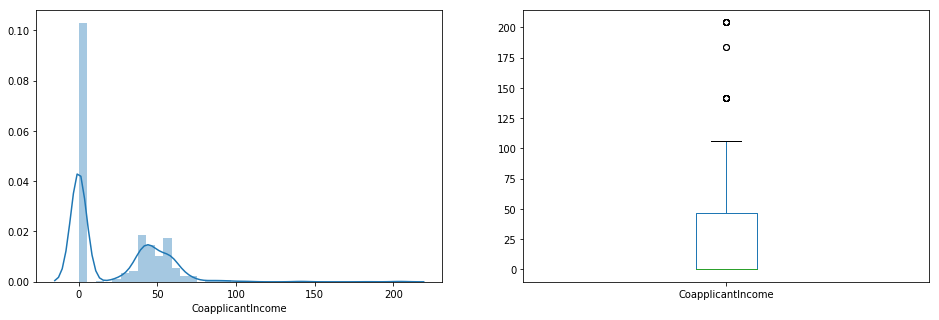

In [106]:
train['CoapplicantIncome'] = np.sqrt(train['CoapplicantIncome'])
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

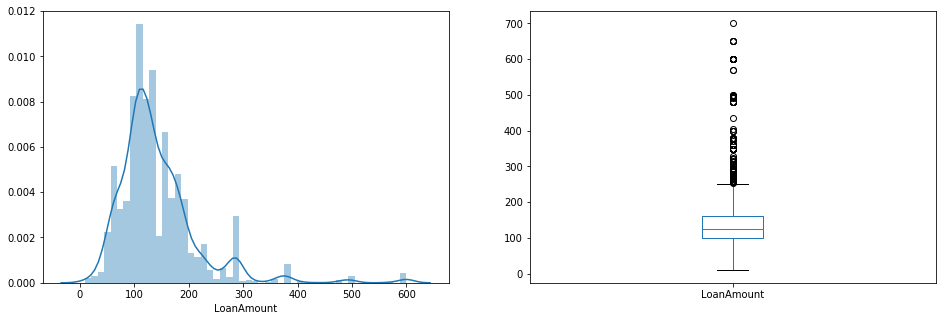

In [107]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


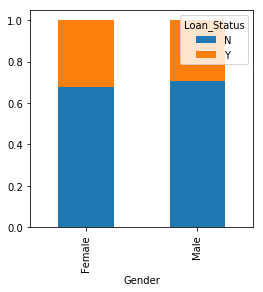

In [108]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

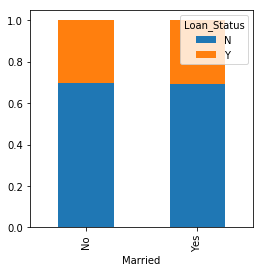

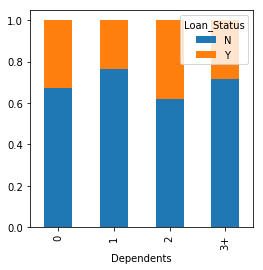

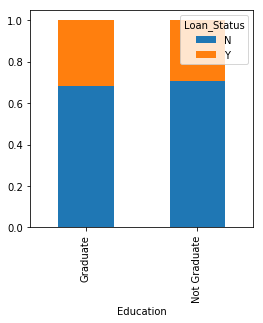

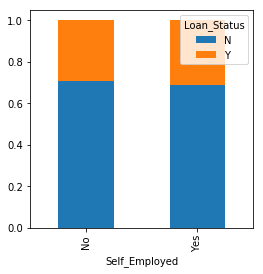

In [109]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

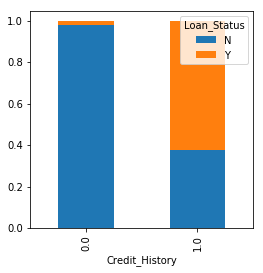

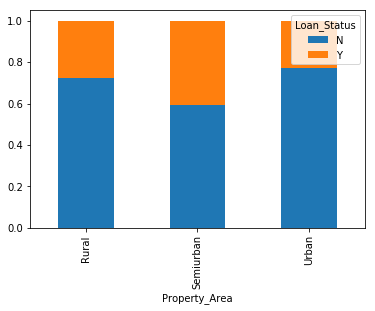

In [110]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

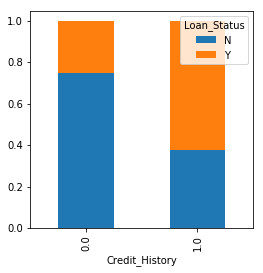

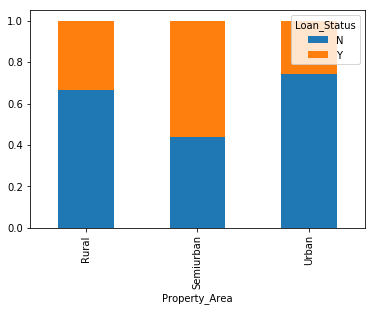

In [114]:
credit_0 = train[train['Credit_History'] == 0.0]
train = pd.concat([train,credit_0[credit_0['Loan_Status'] == 'Y']])

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

**Numerical Independent Variable vs Target Variable

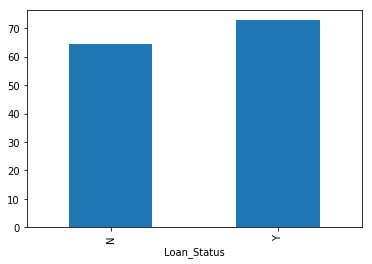

In [115]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

# Preparing Data

In [116]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome'] # Adding extra column of Income For giving more weghts

In [117]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [118]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [119]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [120]:
X = train.drop(['Loan_Status'],1)
y = train.Loan_Status

In [121]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

# Model Implemention

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

# Evaluation 

In [124]:
seed = 43
"""Building machine learning models:
We will try 10 different classifiers to find the best classifier after tunning model's hyperparameters 
that will best generalize the unseen(test) data."""

'''Now initialize all the classifiers object.'''
'''#1.Logistic Regression'''

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)

'''#10.Extreme Gradient Boosting'''
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state = seed)





'''Create a function that returns train accuracy of different models.'''

def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

def test_accuracy(model):
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
#     test_accuracy = np.round(train_accuracy*100)
    return test_accuracy


'''Models with best training accuracy:'''
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), 
                                                    train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), 
                                                    train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc), 
                                                    train_accuracy(xgbc)], 
                               'Test_accuracy(%)': [test_accuracy(lr), test_accuracy(svc), test_accuracy(rf), 
                                                    test_accuracy(knn), test_accuracy(gnb), test_accuracy(dt), 
                                                    test_accuracy(gbc), test_accuracy(abc), test_accuracy(etc), 
                                                    test_accuracy(xgbc)]})


train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']


sorted_train_accuracy = train_accuracy.sort_values(by = 'Test_accuracy(%)', ascending = False)



bold('**Training Accuracy of the Classifiers:**')
display(sorted_train_accuracy)
suppress_warnings()

**Training Accuracy of the Classifiers:**

,Train_accuracy(%),Test_accuracy(%)
RF,100.00,0.991082
ETC,100.00,0.989298
SVC,99.52,0.985731
DT,100.00,0.984542
KNN,96.41,0.938763
GBC,93.96,0.931034
XGBC,93.22,0.920927
ABC,84.23,0.835910
LR,78.44,0.804994
GNB,72.76,0.743757
